In [2]:
# Notebook setup
# Note these libraries are used by Sage's notebook Profile_Examples_for_WHOI.ipynb
import requests
import os
import re
import numpy as np
import xarray as xr
!pip install netcdf4
import pandas as pd
import matplotlib.pyplot as plt

# Make the Plots pretty
import seaborn as sns
sns.set()

# Supress open_mfdataset warnings
import warnings
warnings.filterwarnings('ignore')

  Using cached netCDF4-1.5.4-cp37-cp37m-manylinux1_x86_64.whl (4.3 MB)
  Using cached numpy-1.19.1-cp37-cp37m-manylinux2010_x86_64.whl (14.5 MB)
  Using cached cftime-1.2.1-cp37-cp37m-manylinux1_x86_64.whl (287 kB)


In [3]:
# Provide URL to load a single file that has already been downloaded to OOI's OPENDAP server
# remember to use #fillmismatch
# Inshore Oct 2019
data_url = 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/sbeaulieu@whoi.edu/' \
           '20200806T132326640Z-CP03ISPM-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered/' \
           'deployment0003_CP03ISPM-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered_20191006T150003' \
           '-20191031T212239.977728.nc#fillmismatch'

In [63]:
# from tqdm import tqdm

# def getfile(query, filename):
#     with requests.get(query) as r:
#         if r.status_code != 200:
#             print(f'{filename}: FileNotFound')
#             return
#         total = int(r.headers.get('content-length'))
#         if total == size:
#             print(f'FileExists, Skip: {filename}')
#             return 

#         print('File: {} '.format(filename), end='')
#         with tqdm(total=total) as bar, open(savefile, "wb") as handle:
#             for chunk in r.iter_content(chunk_size=max(int(total / 1000), 1024 * 1024)):
#                 # download progress check tqdm
#                 if chunk: 
#                     handle.write(chunk)
#                     time.sleep(0.1)
#                     bar.update(len(chunk))


# filename = 'whoi_ctd.nc'
# getfile(data_url, filename)

whoi_ctd.nc: FileNotFound


In [4]:
# Load the data file using xarray
ds = xr.open_dataset(data_url)
ds = ds.swap_dims({'obs': 'time'}) #Swap dimensions
print('Dataset has %d points' % ds.time.size)

Dataset has 158237 points


In [5]:
# Investigate the Dataset
ds

<xarray.Dataset>
Dimensions:                                          (time: 158237)
Coordinates:
    obs                                              (time) int32 0 1 ... 158236
    lon                                              (time) float64 ...
    pressure                                         (time) float64 ...
    lat                                              (time) float64 ...
  * time                                             (time) datetime64[ns] 20...
Data variables:
    practical_salinity                               (time) float64 ...
    ctdpf_ckl_seawater_temperature_qartod_executed   |S64 ...
    driver_timestamp                                 (time) datetime64[ns] ...
    id                                               (time) |S64 ...
    conductivity                                     (time) float64 ...
    temperature                                      (time) float64 ...
    density                                          (time) float64 ...
    ctdpf_ckl_seawater_pressure                      (time) float64 ...
    internal_timestamp                               (time) datetime64[ns] ...
    ctdpf_ckl_seawater_conductivity_qartod_results   (time) float32 ...
    ctdpf_ckl_seawater_temperature_qartod_results    (time) float32 ...
    ctdpf_ckl_seawater_temperature                   (time) float64 ...
    ingestion_timestamp                              (time) datetime64[ns] ...
    port_timestamp                                   (time) datetime64[ns] ...
    ctdpf_ckl_seawater_conductivity_qartod_executed  |S64 ...
    deployment                                       (time) int32 ...
    preferred_timestamp                              (time) object ...
    ctdpf_ckl_seawater_conductivity                  (time) float64 ...
Attributes:
    _NCProperties:                   version=1|netcdflibversion=4.6.1|hdf5lib...
    node:                            WFP01
    comment:                         
    publisher_email:                 
    sourceUrl:                       http://oceanobservatories.org/
    collection_method:               recovered_wfp
    stream:                          ctdpf_ckl_wfp_instrument_recovered
    featureType:                     point
    creator_email:                   
    publisher_name:                  Ocean Observatories Initiative
    date_modified:                   2020-08-06T13:23:41.238357
    keywords:                        
    cdm_data_type:                   Point
    references:                      More information can be found at http://...
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    date_created:                    2020-08-06T13:23:41.238351
    id:                              CP03ISPM-WFP01-03-CTDPFK000-recovered_wf...
    requestUUID:                     607b59bd-cfc8-4659-868c-a894a197fb41
    contributor_role:                
    summary:                         Dataset Generated by Stream Engine from ...
    keywords_vocabulary:             
    institution:                     Ocean Observatories Initiative
    naming_authority:                org.oceanobservatories
    feature_Type:                    point
    infoUrl:                         http://oceanobservatories.org/
    license:                         
    contributor_name:                
    uuid:                            607b59bd-cfc8-4659-868c-a894a197fb41
    creator_name:                    Ocean Observatories Initiative
    title:                           Data produced by Stream Engine version 1...
    sensor:                          03-CTDPFK000
    standard_name_vocabulary:        NetCDF Climate and Forecast (CF) Metadat...
    acknowledgement:                 
    Conventions:                     CF-1.6
    project:                         Ocean Observatories Initiative
    source:                          CP03ISPM-WFP01-03-CTDPFK000-recovered_wf...
    publisher_url:                   http://oceanobservatories.org/
    creator_url:    

In [7]:
lons, lats = ds.coords['lon'], ds.coords['lat']
dx = 6
dy = 4
bbox = lons.min()-dx, lons.max()+dx, lats.min()-dy, lats.max()+dy
print(bbox, lons.shape, lats.shape)

(<xarray.DataArray 'lon' ()>
array(-76.888668), <xarray.DataArray 'lon' ()>
array(-64.888668), <xarray.DataArray 'lat' ()>
array(36.364817), <xarray.DataArray 'lat' ()>
array(44.364817)) (158237,) (158237,)


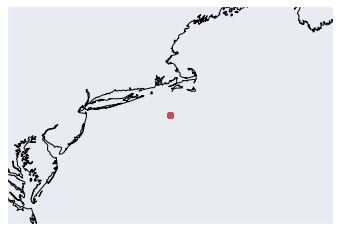

In [8]:
import cartopy.crs as ccrs


# https://ocefpaf.github.io/python4oceanographers/blog/2013/07/29/python-ctd/
projection = ccrs.PlateCarree()
fig, ax = plt.subplots(subplot_kw={"projection": projection})
ax.set_extent(bbox)
ax.coastlines()
ax.plot(lons, lats, "ro");

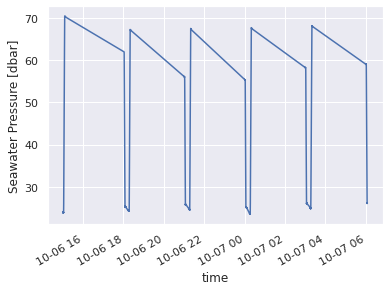

In [14]:
ds['ctdpf_ckl_seawater_pressure'][:4000].plot()

In [15]:
# idx = np.where(np.diff(xr.concat([ds.coords['pressure'][0], ds.coords['pressure']], dim='time')) < 0)
idx = np.where(np.diff(ds.coords['pressure']) < 0)
# start = np.array([0])
ds['ctdpf_ckl_seawater_pressure'][:10]
# ds.coords['pressure'][0]

<xarray.DataArray 'ctdpf_ckl_seawater_pressure' (time: 10)>
array([23.88, 23.94, 24.02, 24.08, 24.12, 24.12, 24.11, 24.08, 24.04, 24.01])
Coordinates:
    obs       (time) int32 0 1 2 3 4 5 6 7 8 9
    lon       (time) float64 -70.89 -70.89 -70.89 ... -70.89 -70.89 -70.89
    pressure  (time) float64 3.388e+03 3.394e+03 ... 3.404e+03 3.401e+03
    lat       (time) float64 40.36 40.36 40.36 40.36 ... 40.36 40.36 40.36 40.36
  * time      (time) datetime64[ns] 2019-10-06T15:00:03 ... 2019-10-06T15:00:...
Attributes:
    comment:                  Seawater Pressure refers to the pressure exerte...
    long_name:                Seawater Pressure
    data_product_identifier:  PRESWAT_L1
    standard_name:            sea_water_pressure
    units:                    dbar
    ancillary_variables:      pressure
    _ChunkSizes:              10000